* Cho dữ liệu ItemList.xlsx
* Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp trong nhóm Association rule learning để tính toán mức độ kết hợp giữa các item.

1. Áp dụng thuật toán (tự lựa chọn các tham số phù hợp cho thuật toán, lưu ý với số lượng transaction càng nhiều thì các ngưỡng nên đặt càng nhỏ). In kết quả. Vẽ biểu đồ.
2. Tìm kiếm thông tin từ kết quả: trong thông tin kết quả có 'sausage' không? Nếu có thì 'sausage' kết hợp với item nào?
3. Cho biết 15 sản phẩm được mua nhiều nhất. Vẽ biểu đồ.
4. Cho biết 15 sản phẩm được mua ít nhất. Vẽ biểu đồ.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# load dữ liệu
data = pd.read_excel("../../Data/ItemList.xlsx", header=None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


In [4]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
records = []
for i in range(0, data.shape[0]):
    records.append([str(data.values[i,j]) for j in range(0, data.shape[1])])

In [6]:
records[0]

['sausage',
 'whole milk',
 'semi-finished bread',
 'yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [7]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.shape

(14963, 168)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Columns: 168 entries, Instant food products to zwieback
dtypes: bool(168)
memory usage: 2.4 MB


In [9]:
df.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=168)

In [11]:
df = df.drop(['nan'], axis=1)

In [12]:
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)


In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968
2,(other vegetables),(bottled water),0.122101,0.060683,0.005480,0.044882,0.739619,-0.001929,0.983457
3,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,-0.001929,0.965051
4,(whole milk),(bottled water),0.157923,0.060683,0.007151,0.045281,0.746196,-0.002432,0.983868
...,...,...,...,...,...,...,...,...,...
69,(tropical fruit),(whole milk),0.067767,0.157923,0.008220,0.121302,0.768108,-0.002482,0.958323
70,(yogurt),(tropical fruit),0.085879,0.067767,0.005213,0.060700,0.895720,-0.000607,0.992477
71,(tropical fruit),(yogurt),0.067767,0.085879,0.005213,0.076923,0.895720,-0.000607,0.990298
72,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638


In [14]:
print(rules.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         74 non-null     object 
 1   consequents         74 non-null     object 
 2   antecedent support  74 non-null     float64
 3   consequent support  74 non-null     float64
 4   support             74 non-null     float64
 5   confidence          74 non-null     float64
 6   lift                74 non-null     float64
 7   leverage            74 non-null     float64
 8   conviction          74 non-null     float64
dtypes: float64(7), object(2)
memory usage: 5.3+ KB
None


In [15]:
# "Có sausage không? nó kết hợp với item nào?"
for row in rules.iterrows():
    if "sausage" in row[1][0]:
        print(row)

(22, antecedents                    (sausage)
consequents           (other vegetables)
antecedent support              0.060349
consequent support              0.122101
support                         0.006015
confidence                      0.099668
lift                            0.816272
leverage                       -0.001354
conviction                      0.975083
Name: 22, dtype: object)
(40, antecedents              (sausage)
consequents           (rolls/buns)
antecedent support        0.060349
consequent support        0.110005
support                   0.005347
confidence                0.088594
lift                      0.805362
leverage                 -0.001292
conviction                0.976508
Name: 40, dtype: object)
(54, antecedents           (sausage)
consequents              (soda)
antecedent support     0.060349
consequent support     0.097106
support                0.005948
confidence              0.09856
lift                   1.014975
leverage               0.00

In [16]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values

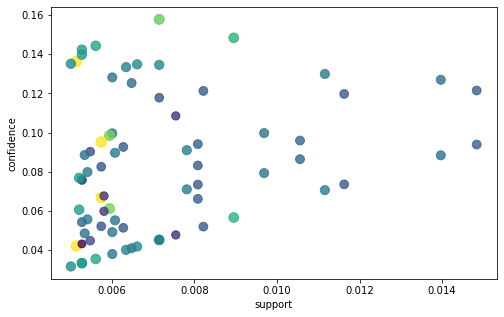

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(support, confidence, s= lift*100,alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [18]:
result = df.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903
True,60,320,22,29,3,4,121,17,508,326,...,80,51,277,654,8,359,175,2363,1285,60


In [19]:
df_true = result.iloc[1,:]
df_true[:15]

Instant food products     60
UHT-milk                 320
abrasive cleaner          22
artif. sweetener          29
baby cosmetics             3
bags                       4
baking powder            121
bathroom cleaner          17
beef                     508
berries                  326
beverages                248
bottled beer             678
bottled water            908
brandy                    38
brown bread              563
Name: True, dtype: int64

In [20]:
x = df_true.sort_values(ascending=False)

In [21]:
top_fifteen_products = x[:15]
top_fifteen_products

whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
pastry               774
pip fruit            734
shopping bags        712
canned beer          702
bottled beer         678
Name: True, dtype: int64

Text(0.5, 1.0, 'Fifteen products best buy')

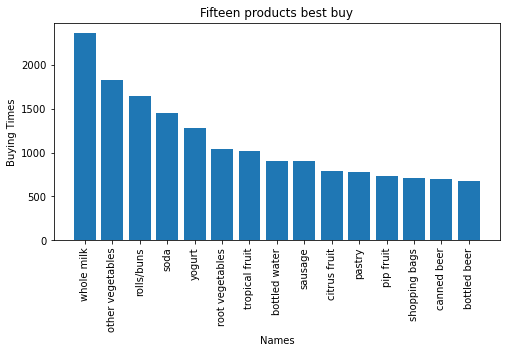

In [22]:
pos = np.arange(len(top_fifteen_products.values))

plt.figure(figsize=(8,4))
plt.bar(pos, top_fifteen_products.values, align='center')
plt.xticks(pos, top_fifteen_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('Fifteen products best buy')

In [23]:
bottom_fifteen_products = x[-15:]
bottom_fifteen_products

specialty vegetables     11
organic products         10
decalcifier               9
hair spray                9
liqueur                   9
whisky                    8
salad dressing            6
make up remover           5
toilet cleaner            5
frozen chicken            5
rubbing alcohol           5
bags                      4
baby cosmetics            3
kitchen utensil           1
preservation products     1
Name: True, dtype: int64

Text(0.5, 1.0, 'Fifteen products worst buy')

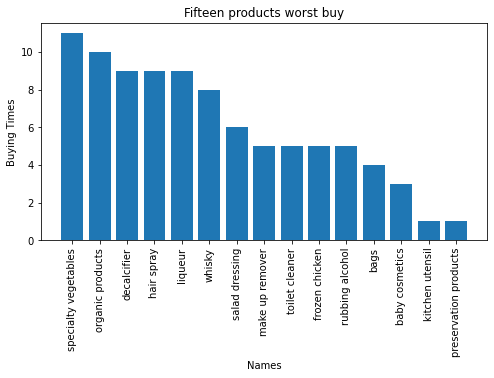

In [24]:
pos = np.arange(len(bottom_fifteen_products.values))

plt.figure(figsize=(8,4))
plt.bar(pos, bottom_fifteen_products.values, align='center')
plt.xticks(pos, bottom_fifteen_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('Fifteen products worst buy')